In [23]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.svm import SVC   
from sklearn.model_selection import GridSearchCV                 
from sklearn.metrics import accuracy_score, balanced_accuracy_score, matthews_corrcoef, confusion_matrix, classification_report, make_scorer, f1_score, precision_score, recall_score


In [24]:
train = pd.read_csv('./feature_extraction/features_last.csv')
validation = pd.read_csv('./feature_extraction/validation.csv', header=None, skiprows=1)
X = pd.read_csv('./feature_extraction/features_last.csv')

In [25]:
train.drop(['song_name'], axis=1, inplace=True)
train.head()

,mean_spectral_rolloff,std_spectral_rolloff,mean_spectral_centroid,std_spectral_centroid,mean_spectral_bandwidth,std_spectral_bandwidth,mean_spectral_flatness,std_spectral_flatness,mean_spectral_contrast,std_spectral_contrast,...,chroma_9_std,chroma_10_mean,chroma_10_std,chroma_11_mean,chroma_11_std,chroma_12_mean,chroma_12_std,chroma_std_mean,chroma_std_std,label
0,3805.839606,949.476395,1784.165850,360.241675,2002.449060,293.057608,0.004498,0.005513,20.526699,8.760242,...,0.016051,0.012161,0.016242,0.029505,0.026990,0.005584,0.009387,0.024978,0.011493,0
1,3550.522098,1725.657379,1530.176679,613.066125,2039.036516,462.432433,0.002298,0.004852,20.676128,8.237203,...,0.012544,0.011963,0.018590,0.033841,0.034856,0.005236,0.012238,0.039440,0.018062,0
2,3042.260232,885.457204,1552.811865,395.559911,1747.702312,276.141616,0.002631,0.003345,22.197517,8.725292,...,0.017231,0.018436,0.018744,0.031178,0.034395,0.005757,0.010093,0.021984,0.010099,0
3,2184.745799,1221.963322,1070.106615,429.366909,1596.412872,407.972419,0.000954,0.001631,21.426268,7.961446,...,0.011256,0.008783,0.009957,0.131948,0.109829,0.002488,0.004752,0.051712,0.022487,0
4,3579.757627,1254.184130,1835.004266,586.003361,1748.172116,297.397392,0.003238,0.004356,21.466338,7.936384,...,0.028426,0.005691,0.007263,0.009544,0.011316,0.010711,0.020425,0.014912,0.007659,0


In [26]:
# check to see if all labels are ints
train['label'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [27]:
X.drop(['song_name'], axis=1, inplace=True)
X.drop(['label'], axis=1, inplace=True)
X.head()

,mean_spectral_rolloff,std_spectral_rolloff,mean_spectral_centroid,std_spectral_centroid,mean_spectral_bandwidth,std_spectral_bandwidth,mean_spectral_flatness,std_spectral_flatness,mean_spectral_contrast,std_spectral_contrast,...,chroma_9_mean,chroma_9_std,chroma_10_mean,chroma_10_std,chroma_11_mean,chroma_11_std,chroma_12_mean,chroma_12_std,chroma_std_mean,chroma_std_std
0,3805.839606,949.476395,1784.165850,360.241675,2002.449060,293.057608,0.004498,0.005513,20.526699,8.760242,...,0.007361,0.016051,0.012161,0.016242,0.029505,0.026990,0.005584,0.009387,0.024978,0.011493
1,3550.522098,1725.657379,1530.176679,613.066125,2039.036516,462.432433,0.002298,0.004852,20.676128,8.237203,...,0.004094,0.012544,0.011963,0.018590,0.033841,0.034856,0.005236,0.012238,0.039440,0.018062
2,3042.260232,885.457204,1552.811865,395.559911,1747.702312,276.141616,0.002631,0.003345,22.197517,8.725292,...,0.010910,0.017231,0.018436,0.018744,0.031178,0.034395,0.005757,0.010093,0.021984,0.010099
3,2184.745799,1221.963322,1070.106615,429.366909,1596.412872,407.972419,0.000954,0.001631,21.426268,7.961446,...,0.007008,0.011256,0.008783,0.009957,0.131948,0.109829,0.002488,0.004752,0.051712,0.022487
4,3579.757627,1254.184130,1835.004266,586.003361,1748.172116,297.397392,0.003238,0.004356,21.466338,7.936384,...,0.023868,0.028426,0.005691,0.007263,0.009544,0.011316,0.010711,0.020425,0.014912,0.007659


In [28]:
y = train['label'].copy()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [29]:
# Normalization of Data
scaler = StandardScaler()
X = scaler.fit_transform(np.array(X.iloc[:, :-1], dtype = float))

In [30]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=15, stratify=y,  shuffle=True)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)

(800, 142)
(800,)
(200, 142)
(200,)


(None, None)

In [31]:
y_train.head()

535    5
973    9
825    8
531    5
425    4
Name: label, dtype: int64

In [32]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
y_test.shape

(200,)

In [34]:
parameters = {'kernel':('linear', 'rbf', 'poly'),
              'C':[1, 10, 20]
             }

param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear', 'rbf', 'poly']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['linear', 'rbf', 'poly']},
 ]

cls=SVC()
# model.fit(X_valid, y_valid, groups=None)
model = GridSearchCV(cls, param_grid, cv=3)
model.fit(X_train,y_train,groups=None)
model


GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'kernel': ['linear', 'rbf', 'poly']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['linear', 'rbf', 'poly']}])

In [35]:
print(model.best_params_)

{'C': 100, 'kernel': 'rbf'}


In [36]:
scoring = {'prec_macro': 'precision_macro', 'recall_score': make_scorer(recall_score, average='weighted'), 'f1_score': make_scorer(f1_score, average='weighted'), 
           'precision_score': make_scorer(precision_score, average='weighted'), 'accuracy_score': make_scorer(accuracy_score)}
scores = cross_validate(cls, X, y, scoring=scoring, cv=10)
sorted(scores.keys())
scores

{'fit_time': array([0.11683846, 0.07153273, 0.07167077, 0.07781243, 0.07107782,
        0.07315993, 0.07263899, 0.07363272, 0.07595301, 0.07323885]),
 'score_time': array([0.0194447 , 0.01911879, 0.02046013, 0.01895046, 0.01896167,
        0.01901889, 0.01888061, 0.01990223, 0.01954126, 0.01898026]),
 'test_prec_macro': array([0.66452381, 0.67238095, 0.84692308, 0.76101265, 0.6703108 ,
        0.70440115, 0.71038295, 0.84575928, 0.6593007 , 0.81667388]),
 'test_recall_score': array([0.65, 0.69, 0.84, 0.74, 0.7 , 0.7 , 0.67, 0.82, 0.69, 0.81]),
 'test_f1_score': array([0.63838261, 0.66743597, 0.83728613, 0.73825671, 0.67414755,
        0.69298648, 0.6718977 , 0.82162167, 0.6525637 , 0.8093989 ]),
 'test_precision_score': array([0.66452381, 0.67238095, 0.84692308, 0.76101265, 0.6703108 ,
        0.70440115, 0.71038295, 0.84575928, 0.6593007 , 0.81667388]),
 'test_accuracy_score': array([0.65, 0.69, 0.84, 0.74, 0.7 , 0.7 , 0.67, 0.82, 0.69, 0.81])}

In [37]:
test_pred = model.predict(X_test)

np.savetxt("accuracy_solution.csv", 
           np.dstack((np.arange(1, test_pred.size+1),test_pred))[0],
           delimiter=',', comments="", fmt='%i,%i',
           header="Sample_id,Sample_label")

Accuracy :  0.795
Balanced Accuracy :  0.7949999999999999
Matthews Correlation Coefficient:  0.7727160597311248
F1 Score:  0.7942878374714062
Precision Score:  0.7973403473031955


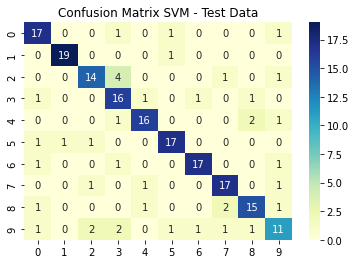

<Figure size 432x288 with 0 Axes>

In [38]:
print("Accuracy : ", accuracy_score(y_test, test_pred))
print("Balanced Accuracy : ", balanced_accuracy_score(y_test, test_pred))
print("Matthews Correlation Coefficient: ", matthews_corrcoef(y_test, test_pred))
print("F1 Score: ", f1_score(y_test, test_pred, average = 'weighted'))
print("Precision Score: ", precision_score(y_test, test_pred, average = 'weighted'))


conf_matrix = confusion_matrix(y_test, test_pred)

df_cm = pd.DataFrame(conf_matrix, index = [i for i in range(10)],
                columns = [i for i in range(10)])

plt.title('Confusion Matrix SVM - Test Data')
sn.heatmap(df_cm, annot=True, cmap="YlGnBu")
plt.savefig('./confusion_matrix_svm_test.png')
plt.show()
plt.clf()

In [39]:
print(classification_report(y_test, test_pred, digits=3))

              precision    recall  f1-score   support

           0      0.773     0.850     0.810        20
           1      0.950     0.950     0.950        20
           2      0.778     0.700     0.737        20
           3      0.640     0.800     0.711        20
           4      0.842     0.800     0.821        20
           5      0.850     0.850     0.850        20
           6      0.895     0.850     0.872        20
           7      0.810     0.850     0.829        20
           8      0.789     0.750     0.769        20
           9      0.647     0.550     0.595        20

    accuracy                          0.795       200
   macro avg      0.797     0.795     0.794       200
weighted avg      0.797     0.795     0.794       200

